In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm.auto import tqdm
import numpy as np

c:\Users\freak\miniforge3\envs\qsar\Lib\site-packages\chembl_webresource_client\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version
c:\Users\freak\miniforge3\envs\qsar\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'chembl_release', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [3]:
molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')
mols

[{'molecule_chembl_id': 'CHEMBL1737'}]

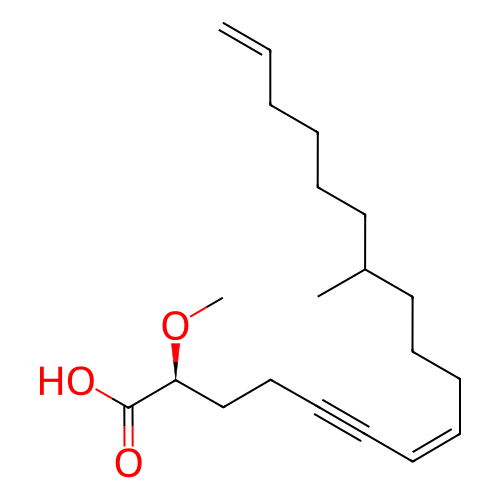

In [19]:
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL477888'))

In [20]:
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL240'))

KeyboardInterrupt: 

In [17]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

# initialize APIs
activity = new_client.activity
target = new_client.target
molecule = new_client.molecule

# Optionally, inspect the target entry
t = target.filter(target_chembl_id="CHEMBL477889").only("target_chembl_id", "pref_name", "target_type")
print(pd.DataFrame.from_records(t))

# Fetch bioactivity data for that target
# We want IC50 data, ideally for human assays, exact measurements.
bio = activity.filter(
    target_chembl_id="CHEMBL477888",
    standard_type="IC50",
    standard_value__isnull=False
)

# Convert to DataFrame
df = pd.DataFrame.from_records(bio)

# Optionally filter further (human, relation = “=”, assay_type = binding, etc.)
# df2 = df[
#     # (df["target_organism"] == "Homo sapiens") &
#     # (df["relation"] == "=") &
#     # (df["assay_type"] == "B")
# # ]

# # You now have a table of compounds + IC50 values, SMILES etc.
# print(df2.head())
df

Empty DataFrame
Columns: []
Index: []


""


In [18]:
similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res

[{'molecule_chembl_id': 'CHEMBL2296002', 'pref_name': None, 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL1697753', 'pref_name': 'ASPIRIN DL-LYSINE', 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL3833404', 'pref_name': 'CARBASPIRIN', 'similarity': '88.8888895511627197265625'}, {'molecule_chembl_id': 'CHEMBL3833325', 'pref_name': 'CARBASPIRIN CALCIUM', 'similarity': '88.8888895511627197265625'}, '...(remaining elements truncated)...']

In [21]:
similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL240', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res

HttpNotFound: Error for url https://www.ebi.ac.uk/chembl/api/data/similarity.json, server response: {"error_message": "Couldn't find an instance of 'MoleculeDictionary' which matched 'chembl_id=['CHEMBL240']'.", "traceback": "Traceback (most recent call last):\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 274, in wrapper\n    response = callback(request, *args, **kwargs)\n               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/usr/local/lib/python3.11/site-packages/tastypie/resources.py\", line 467, in dispatch_list\n    return self.dispatch('list', request, **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 904, in dispatch\n    response = method(request, **kwargs)\n               ^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 839, in get_list\n    return self.response(self.get_list_impl)(request, **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 744, in get_something\n    ret = f(request, basic_bundle, **kwargs)\n          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/similarity.py\", line 160, in get_list_impl\n    return self.serialise_list(self.list_cache_handler(self.cached_obj_get_list), for_list=True,\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 813, in handler\n    to_be_serialized, in_cache = f(bundle=base_bundle,\n                                 ^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/similarity.py\", line 190, in handle\n    objects, in_cache = f(bundle=bundle, **self.remove_api_resource_names(kwargs))\n                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/similarity.py\", line 155, in cached_obj_get_list\n    return self.detail_cache_handler(self.obj_get_list)(bundle, 'list', **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/core/resource.py\", line 716, in handle\n    cached_bundle = f(bundle=bundle, **kwargs)\n                    ^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/similarity.py\", line 149, in obj_get_list\n    raise e\n\n  File \"/chembl_ws_py3/src/chembl_webservices/resources/similarity.py\", line 89, in obj_get_list\n    raise ObjectDoesNotExist(\"Couldn't find an instance of '%s' which matched '%s'.\" %\n\ndjango.core.exceptions.ObjectDoesNotExist: Couldn't find an instance of 'MoleculeDictionary' which matched 'chembl_id=['CHEMBL240']'.\n"}

In [ ]:
import pandas as pd

dataset = pd.read_csv('chembl_herg_data.csv', header=0, on_bad_lines='skip',sep=';')

clean_ds = dataset.loc[:,['Molecule Name',"Molecular Weight","AlogP","Smiles","Standard Type","Standard Relation","Standard Value","Standard Units","pChEMBL Value","Ligand Efficiency BEI","Ligand Efficiency LE","Ligand Efficiency LLE","Ligand Efficiency SEI"]]

smiles_df = dataset.loc[:, ['Smiles', "Standard Type", "Standard Relation", "Standard Value", "Standard Units"]]

# Rows where Standard Value is missing (NaN)
non_empty_std_value = smiles_df[smiles_df['Standard Value'].notna()]
print(f"Number of rows with non-empty Standard Value: {non_empty_std_value.shape[0]}")
print("First few indices:", non_empty_std_value.index.tolist()[:20])
print()

# Optionally inspect first few rows
# Check if all Standard Units are 'nM'
all_nm = non_empty_std_value['Standard Units'].eq('nM').all()
print("All units are 'nM':", all_nm)
print("Unique units:", non_empty_std_value['Standard Units'].unique())
print("Value counts:\n", non_empty_std_value['Standard Units'].value_counts(dropna=False))
# non_empty_std_value

# smiles_df.loc[empty_std_value]

# print(dataset.head)
# dataset
# clean_ds
# smiles_df

Number of rows with non-empty Standard Value: 16642
First few indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
All units are 'nM': False
Unique units: ['nM' 'ug.mL-1' 'ucm']
Value counts:
 Standard Units
nM         16626
ug.mL-1       13
ucm            3
Name: count, dtype: int64


In [2]:
from qsar_herg_model import HERGQSARModel

model = HERGQSARModel()


print("hERG Cardiotoxicity QSAR Model")
print("=" * 50)

# Create model instance
model = HERGQSARModel(fingerprint_type='morgan', model_type='rf')

# Create sample dataset
# df = model.create_sample_dataset(n_samples=500)
df = clean_ds

# Train the model
training_results = model.train(df, test_size=0.2, cv_folds=5)

# Evaluate the model
evaluation_results = model.evaluate_model(plot=True)

# Example predictions
test_molecules = [
    'CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12',  # Likely hERG blocker
    'CC(=O)Nc1ccc(O)cc1',                  # Likely non-blocker (acetaminophen)
    'CN1C=NC2=C1C(=O)N(C)C(=O)N2C',       # Likely non-blocker (caffeine)
]

print("\nExample Predictions:")
print("-" * 50)
predictions = model.predict(test_molecules)

for pred in predictions:
    print(f"SMILES: {pred['smiles']}")
    print(f"Prediction: {pred['prediction']}")
    print(f"Probability: {pred['probability']:.3f}")
    print(f"Risk Level: {pred['risk_level']}")
    print("-" * 30)

# Save the model
model.save_model('herg_qsar_model.pkl')

print("Model training and evaluation complete!")
print("Check 'herg_model_evaluation.png' for detailed results.")


hERG Cardiotoxicity QSAR Model
Training RF model with morgan fingerprints...
Generating morgan fingerprints...


KeyError: 'canonical_smiles'